## Compulsory Task

In [98]:
# Importing necessary modules.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

### Loading the Data

In [99]:
# Reading data from 'Iris.csv' file and storing into dataframe.
df = pd.read_csv('Iris.csv', encoding='unicode_escape')

# Displaying first 5 rows of data.
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


I am going to select the features Petal Length and Petal Width to use for this excercise.

### Plotting Dendrograms

First, I am going to scale the data using the Standard Scaler

In [100]:
# Assigning selected features to X variable and reshaping to allow for 
# compatibility.
X = df[['PetalLengthCm','PetalWidthCm']].values.reshape(-1,2)

# Scaling the Data.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

Next, I have printed dendrograms for the following combinations:
* Single Linkage & Euclidean Distance Metric
* Single Linkage & Cityblock Distance Metric
* Complete Linkage & Euclidean Distance Metric
* Complete Linkage & Cityblock Distance Metric

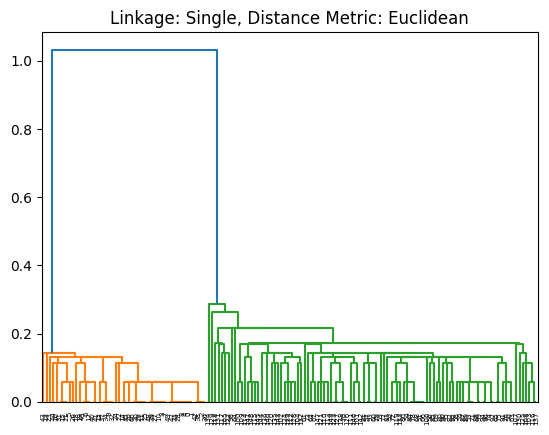

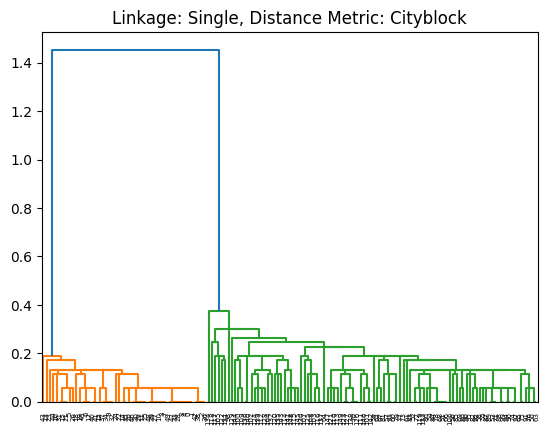

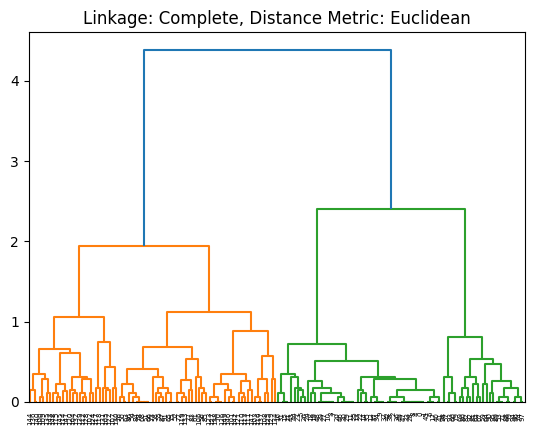

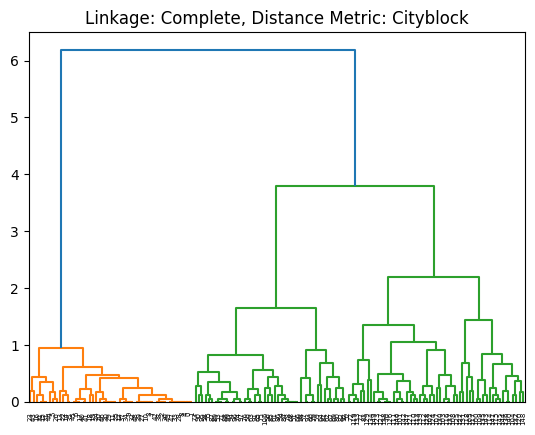

In [101]:
# Single & Euclidean
plt.figure()
plt.title('Linkage: Single, Distance Metric: Euclidean')
dend_1 = dendrogram(linkage(X_scaled, method='single', metric='euclidean'))

# Single & Cityblock
plt.figure()
plt.title('Linkage: Single, Distance Metric: Cityblock')
dend_2 = dendrogram(linkage(X_scaled, method='single', metric='cityblock'))

# Complete & Euclidean
plt.figure()
plt.title('Linkage: Complete, Distance Metric: Euclidean')
dend_3 = dendrogram(linkage(X_scaled, method='complete', metric='euclidean'))

# Complete & Cityblock
plt.figure()
plt.title('Linkage: Complete, Distance Metric: Cityblock')
dend_4 = dendrogram(linkage(X_scaled, method='complete', metric='cityblock'))

### Clustering
I am choosing to continue with the 4th dendrogram (Complete & Cityblock) as its vertical lines are the longest.

On the diagram the blue lines represent the clusters. As there are 2 blue lines, we have 2 clusters, so n_clusters = 2.

Text(0, 0.5, 'Petal Width')

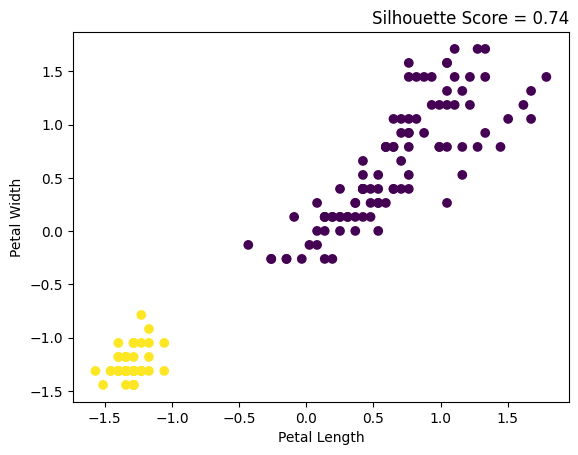

In [102]:
n = 2 # Number of Clusters

# Running agglomerative clustering using linkage method & distance metric from
# dendrogram.
plt.figure()
cluster = AgglomerativeClustering(n_clusters=n, affinity='cityblock', linkage='complete')
cluster.fit_predict(X_scaled)
ax = plt.scatter(X_scaled[:,0], X_scaled[:,1], c=cluster.labels_)

# Calculating Silhouette Score.
score = round(silhouette_score(X_scaled, cluster.labels_, metric='euclidean'),2)
  
plt.title(f'Silhouette Score = {score}', loc='right')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

The Silhouette Score is 0.74. As this is quite high since it is close to 1, it shows good confidence in the solution.
However, the original data does have 3 classes.